# Algerian Forest Fires Dataset Project EDA (Exploratory Data Analysis)

## Introduction
Fires happen when ignition (from a lightning strike or a careless bonfire, for example) meets available fuel (such as dry vegetation), and warm, dry air fans the flames.

That’s why the fire season tends to coincide with high temperatures and dry conditions. In the eastern U.S., fire season lasts from March through May, while the West sees most of its fire activity from June through October.

Fires are an important and necessary part of the lifecycle for many different kinds of ecosystems. For as long as forests and grasslands have grown on earth, fires have burned them. In fact, some tree species, like lodgepole pines and aspens, need fire to stimulate their growth.

Fires have also been used by people as a way to manage lands, whether to clear land for farming, get rid of unwanted pests, or to restore nutrients to the soil.

## About the Dataset
The dataset used in this project contains information about forest fires that occurred in two regions of Algeria: Bejaia region and Sidi Bel-Abbes region, from June to September 2012. The data includes the following features:\
Date (DD/MM/YYYY): Day, month (June to September), year (2012)

Weather data observations:\
Temp: temperature noon (temperature max) in Celsius degrees (22 to 42)\
RH: Relative Humidity in % (21 to 90)\
Ws: Wind speed in km/h (6 to 29)\
Rain: total day in mm (0 to 16.8)

FWI Components:\
Fine Fuel Moisture Code (FFMC) index from the FWI system (28.6 to 92.5)\
Duff Moisture Code (DMC) index from the FWI system (1.1 to 65.9)\
Drought Code (DC) index from the FWI system (7 to 220.4)\
Initial Spread Index (ISI) index from the FWI system (0 to 18.5)\
Buildup Index (BUI) index from the FWI system (1.1 to 68)\
Fire Weather Index (FWI) Index (0 to 31.1)

Classes: two classes, namely: fire and not fire

## EDA
In order to gain insight into the patterns and trends of forest fires in Algeria, the data is analyzed and visualized in the EDA. In addition, the data is pre-processed in order to prepare it for use in the machine learning models.

## Agenda for this Notebook
In this notebook, We are doing some analysis for the Forest Fire using below steps.
- Load Dataset
- Data Preparation & cleaning
- Exploratory Analysis & Visualization
- Summarize & Conclusion

In [1]:
## importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## importing the data set

df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

Observation: The dataset has 246 rows and 15 columns

## Data Cleaning and Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Observation: Looks like all the features are identified as object but can be converted into numeric, if we remove rows which has strings.

In [5]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [6]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [8]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [9]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


Null and other unwanted rows are removed

In [10]:
#remove 122th column
df= df.drop(122).reset_index(drop=True)

Some column names were misspaced so we can fix it

In [11]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
## Looks like the values were misspaced so we can use str.strip() method

# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Changing the required columns as integer data type

In [13]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

Changing the other columns to Float data type

In [14]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [15]:
# Final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


Data Cleaning in target variable

In [17]:
# Check Unique values of target variable
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [18]:
# Strip mispaced values
df.Classes = df.Classes.str.strip()

In [19]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

Region 1 (Bejaia Region)

In [20]:
## Check duplicates

df.duplicated().sum()

0

In [21]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


Region 2 (Sidi-Bel Abbes Region)

In [22]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [23]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

## Exploratory Data Analysis (EDA)

In [24]:
## dropping year features

df1 = df.drop(['day', 'month', 'year'], axis=1)

In [25]:
## Encoding not fire as 0 and fire as 1

df1['Classes'] = np.where(df1['Classes']=='not fire', 0 , 1)

In [26]:
## Check counts
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [27]:
numeric_col = [col for col in df1.columns if df1[col].dtype != 'object']
object_col = [col for col in df1.columns if df1[col].dtype == 'object']

## Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

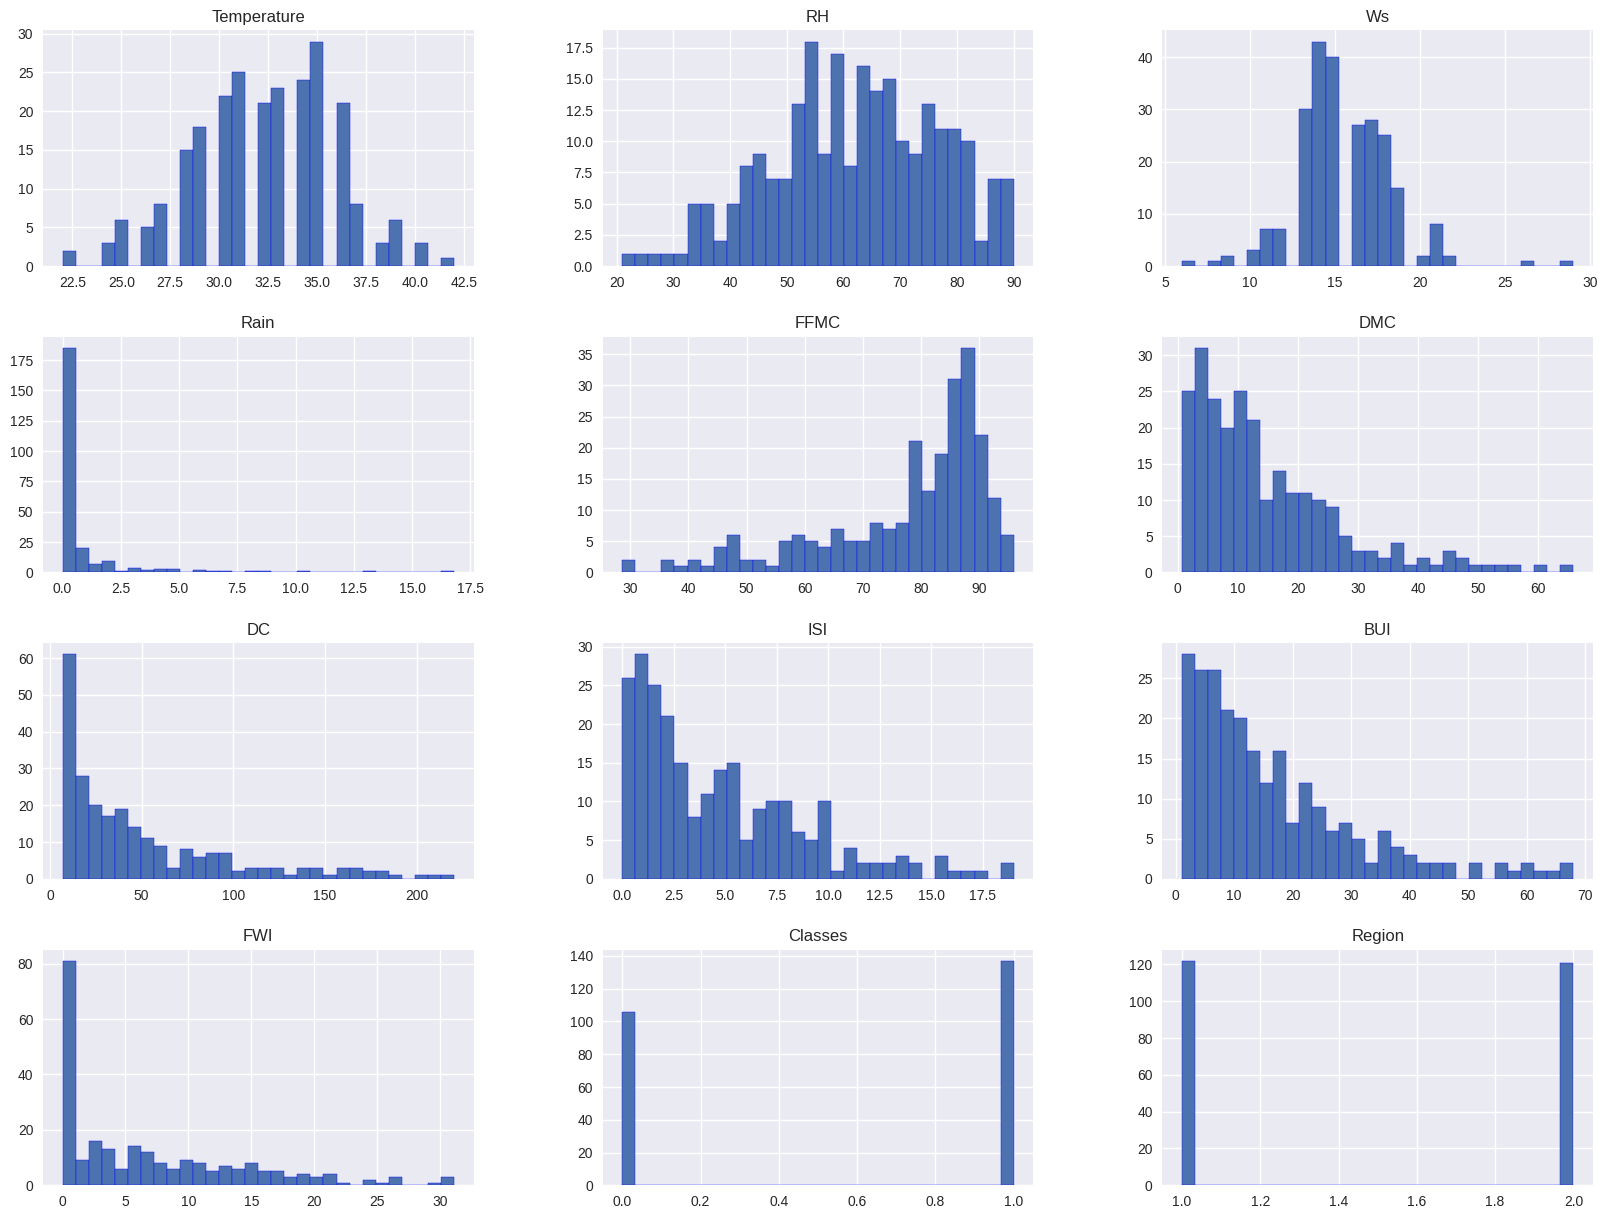

In [28]:
## density plots
plt.style.use('seaborn')
df1.hist(bins=30, figsize=(20, 15), ec='b')
plt.show

In [29]:
## piechart

## percentage calc
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

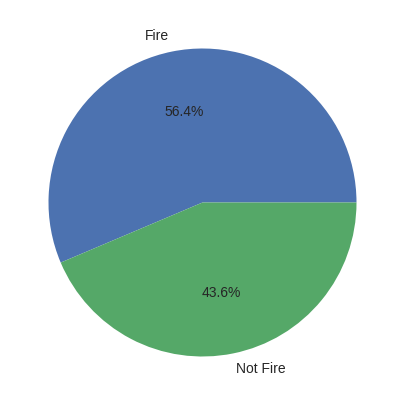

In [30]:
classLabels = ['Fire', 'Not Fire']
plt.figure(figsize=(12, 5))
plt.pie(percentage, labels=classLabels, autopct='%1.1f%%')
plt.show()

<AxesSubplot: >

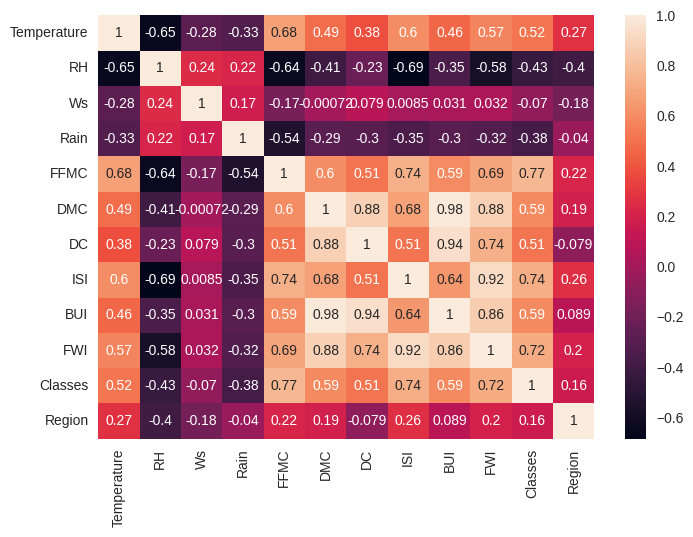

In [31]:
## Checking Multicollinearity

# Correlation chart
sns.heatmap(df1.corr(), annot=True)

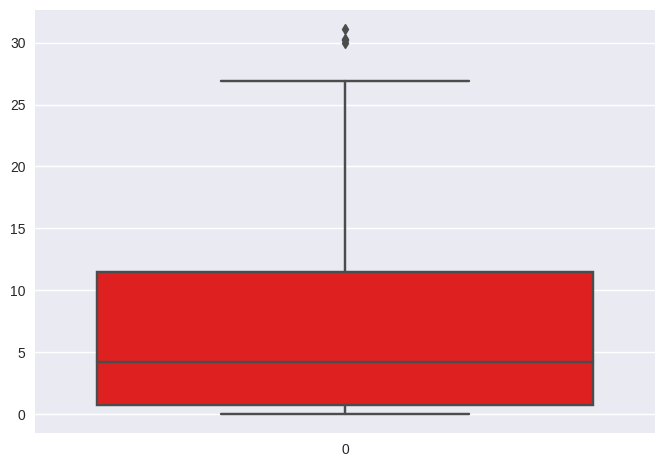

In [32]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red')

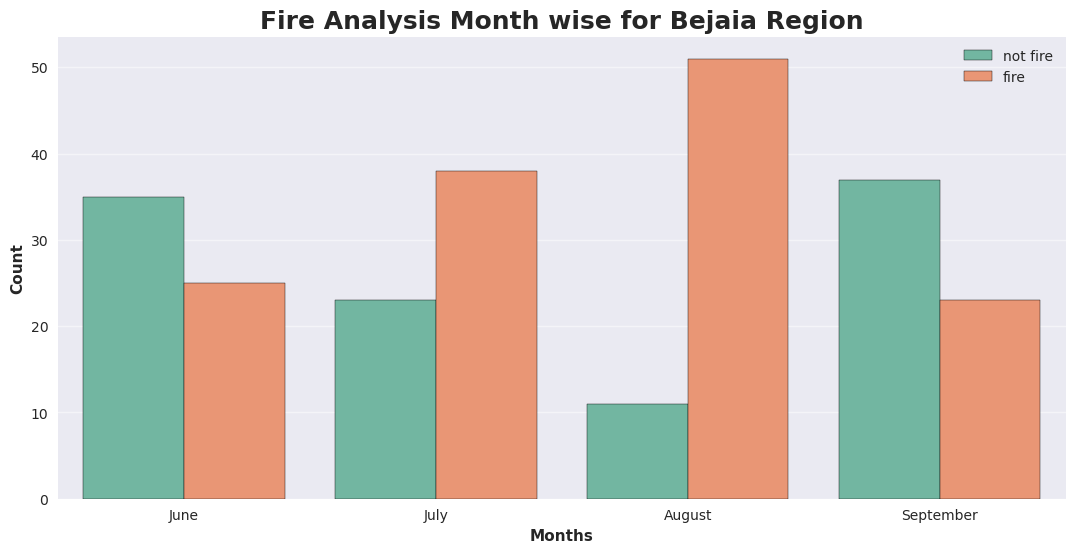

In [33]:
##Monthwise Fire Analysis

dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

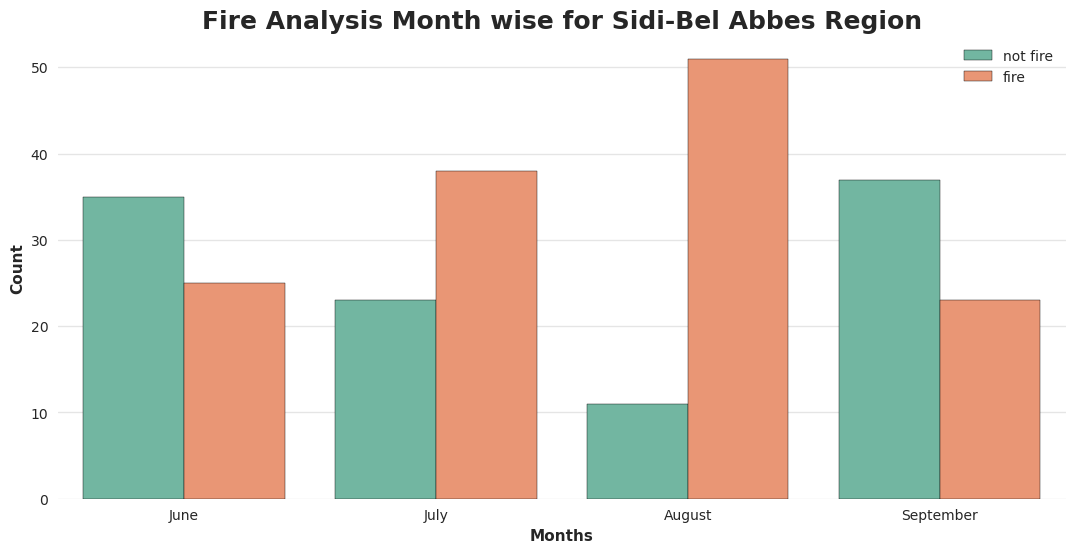

In [34]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

Observations:
    
Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

## Exploratory Data Analysis (EDA) on all Features

In [35]:
## All Features
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [36]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

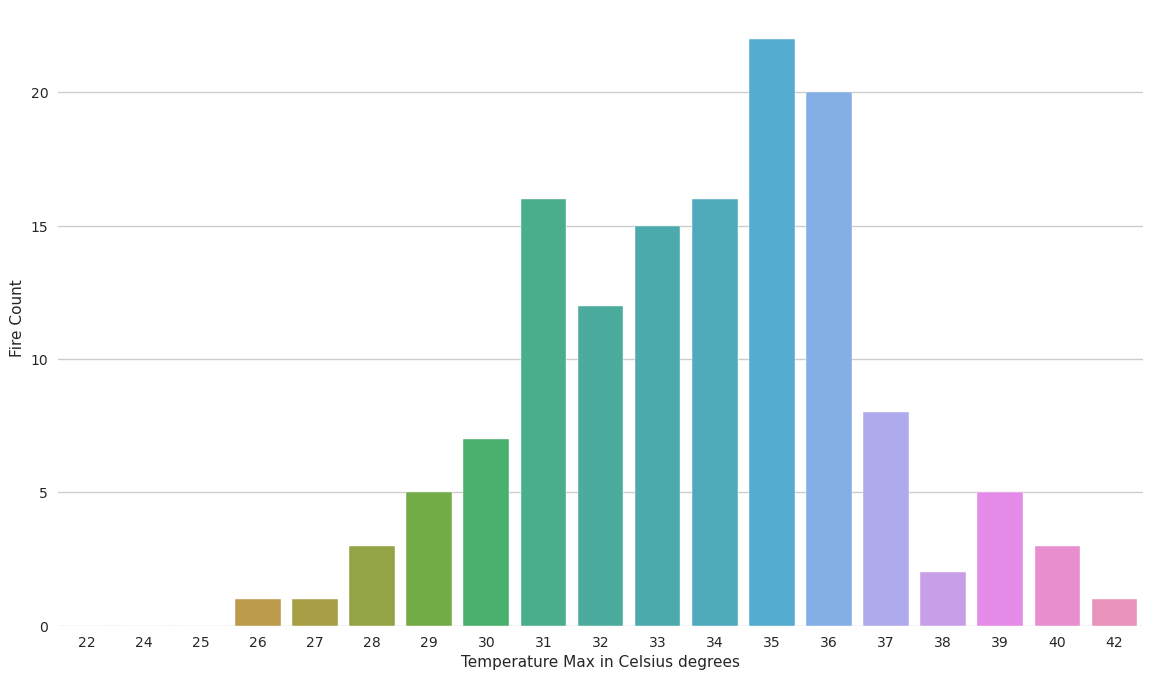

In [37]:
barchart('Temperature','Temperature Max in Celsius degrees')

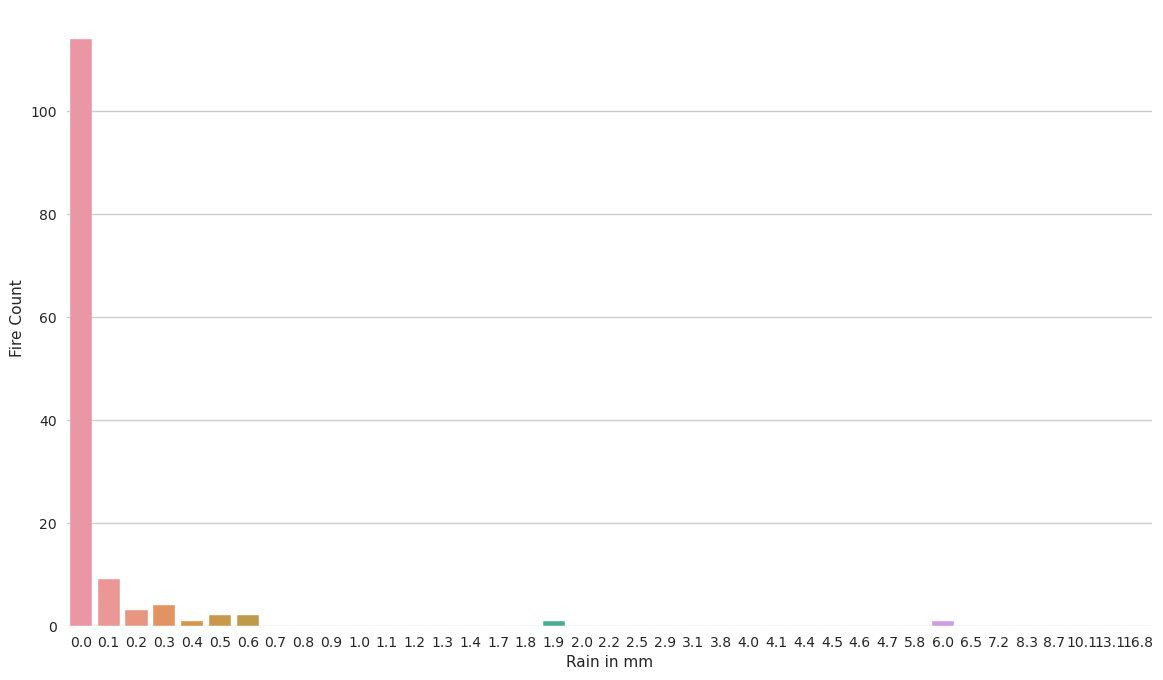

In [38]:
barchart('Rain', 'Rain in mm')

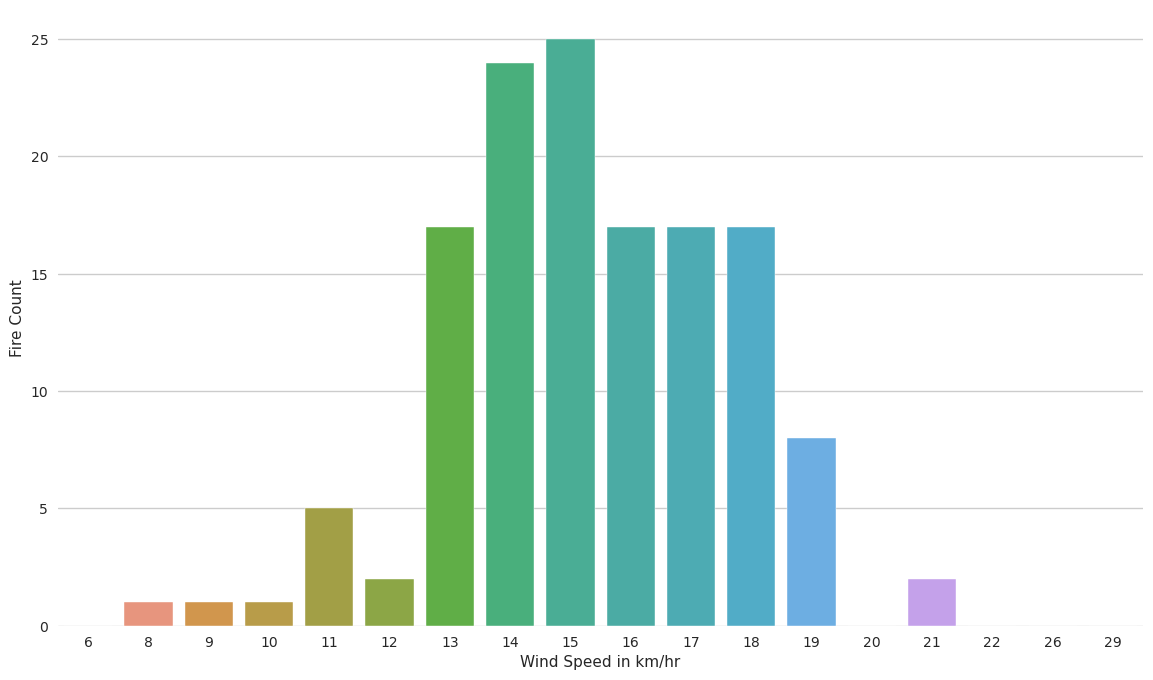

In [39]:
barchart('Ws', 'Wind Speed in km/hr')

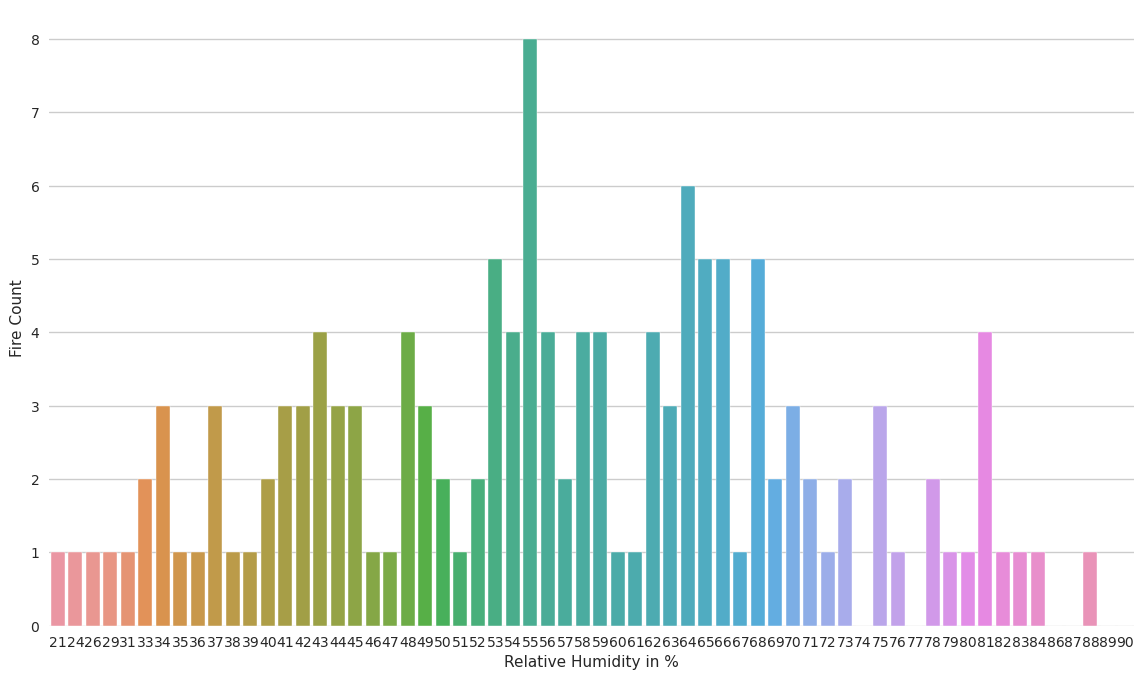

In [40]:
barchart('RH','Relative Humidity in %')

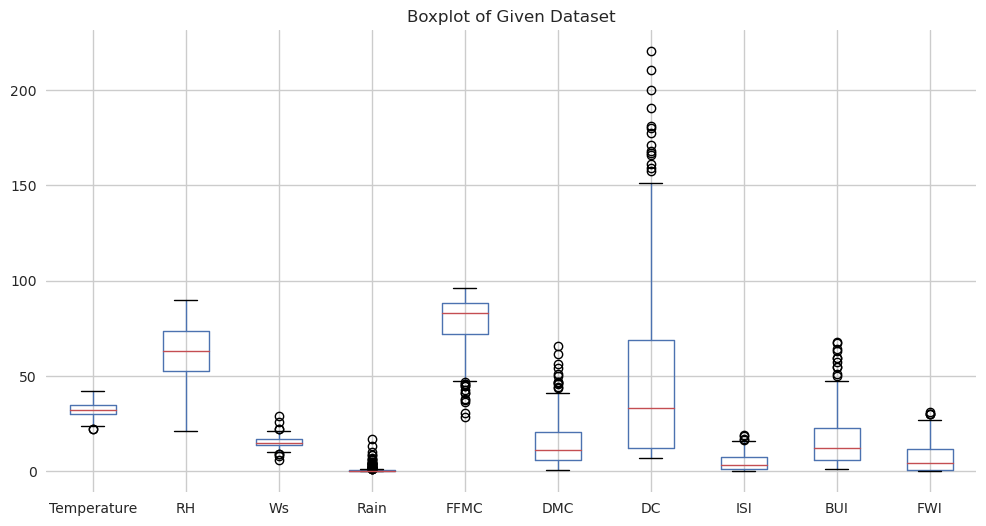

In [41]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

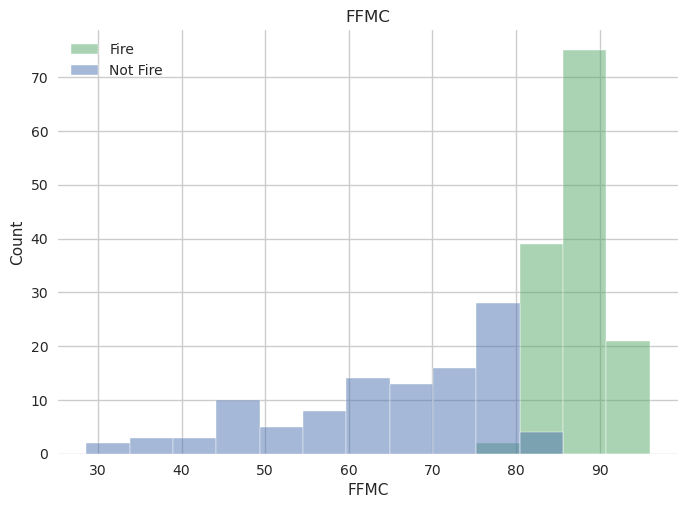

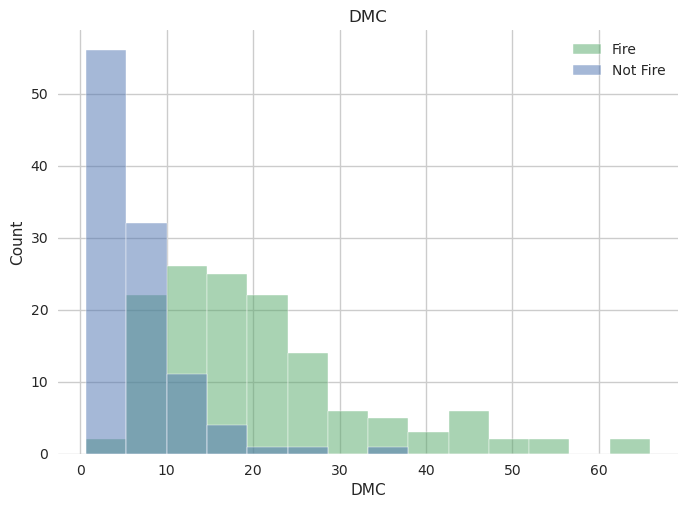

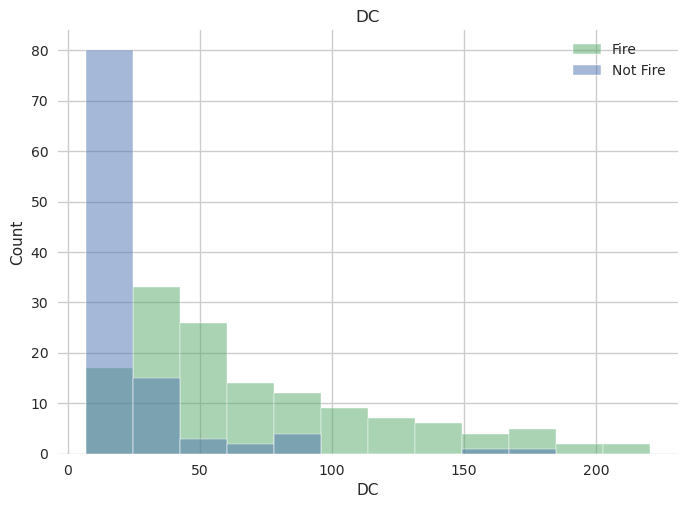

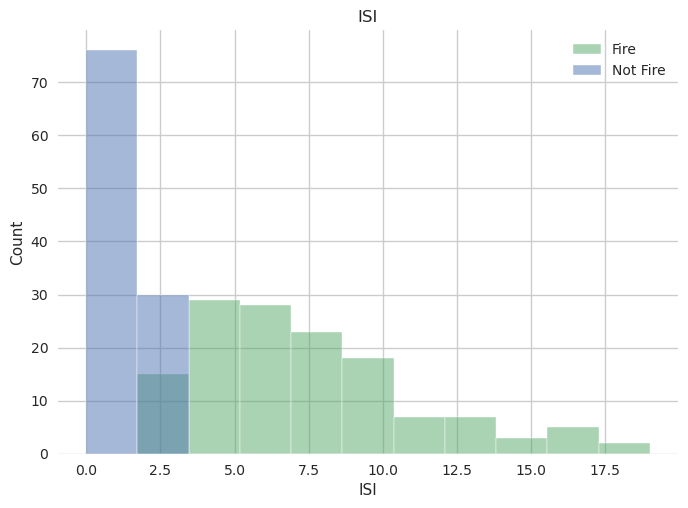

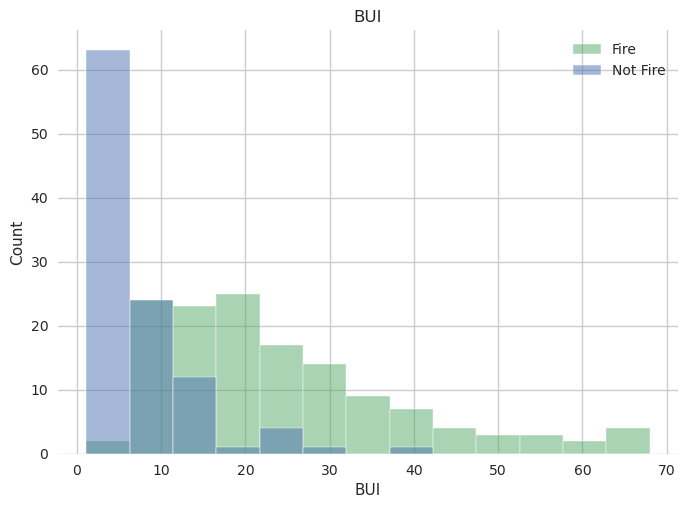

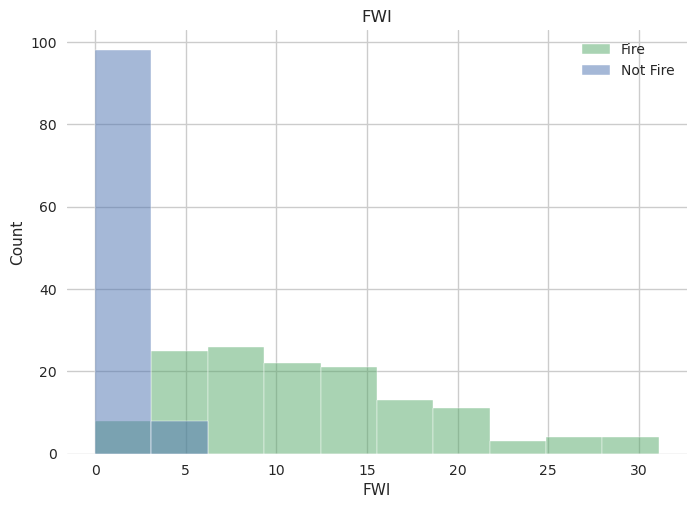

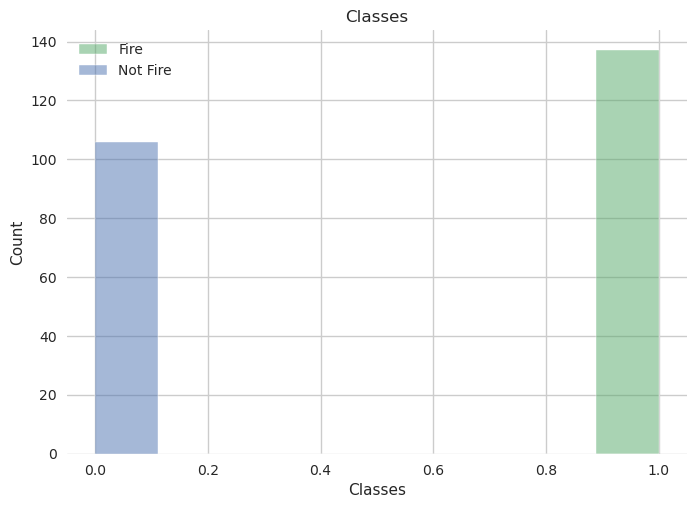

In [42]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

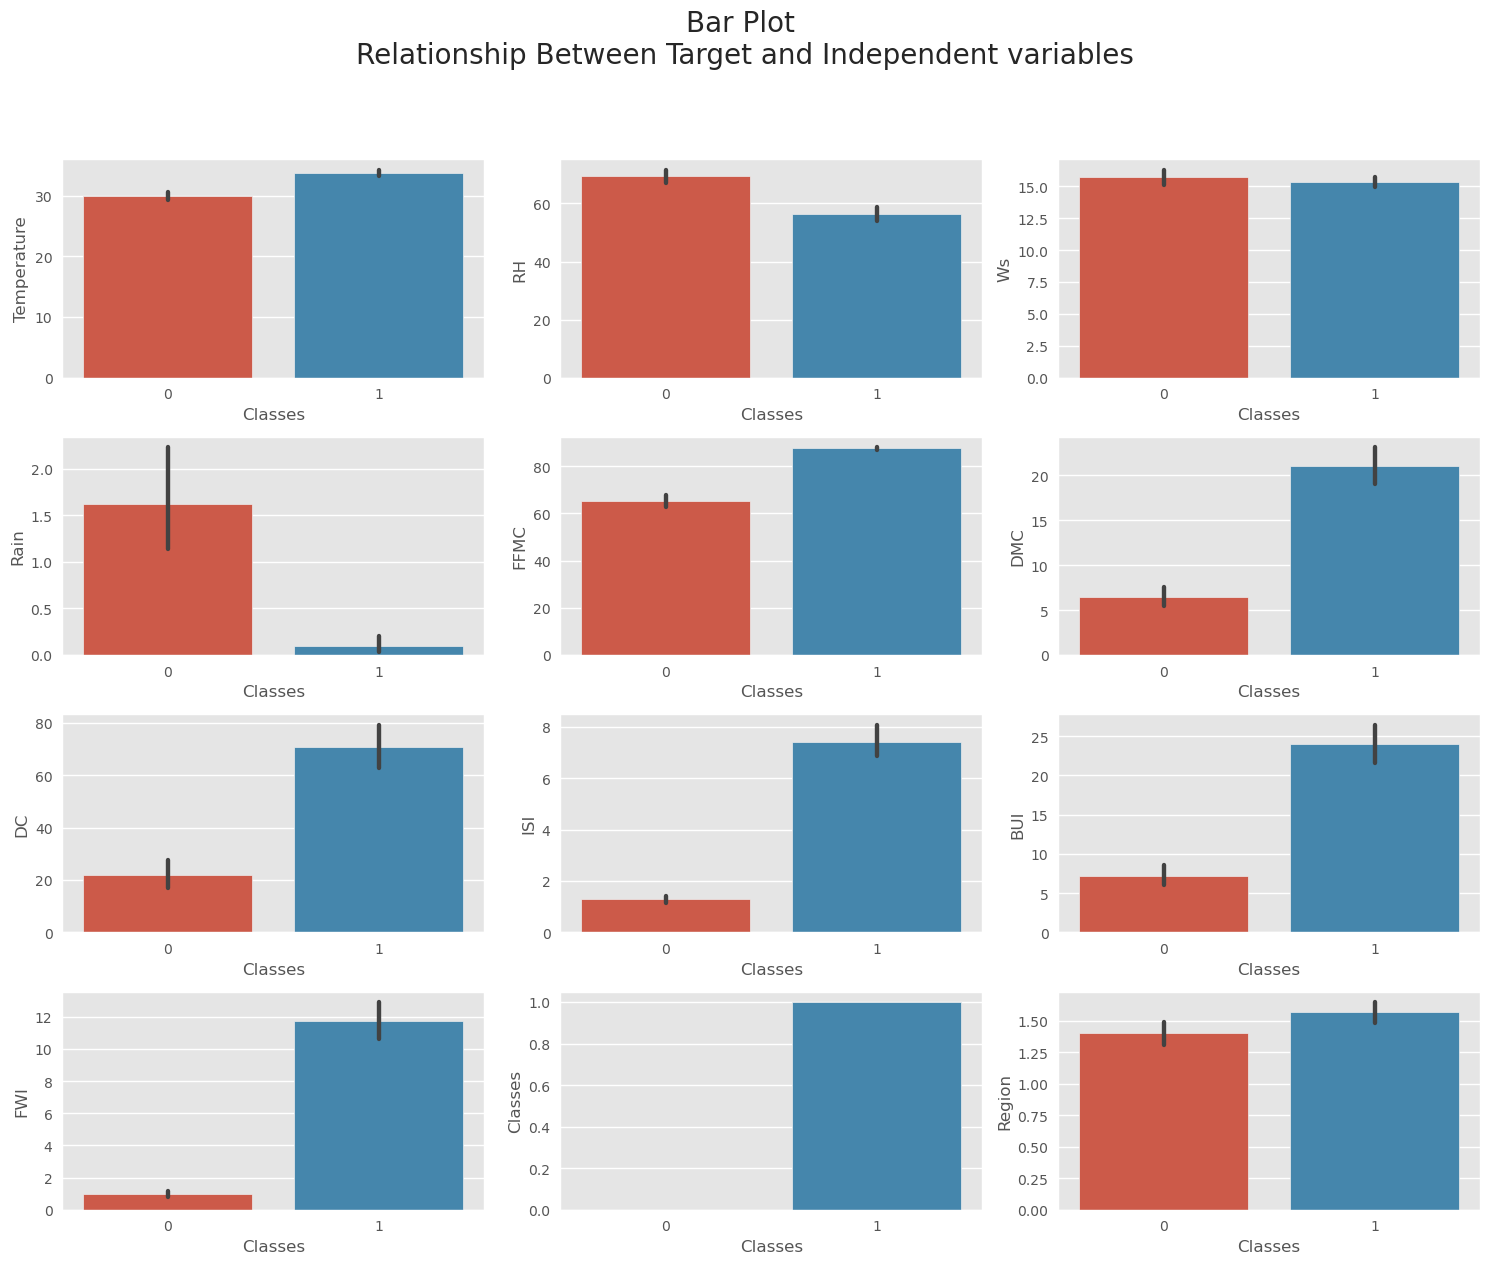

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
plt.suptitle('Bar Plot \nRelationship Between Target and Independent variables'
, fontsize=20, alpha=1, y=1.05)
for i in range(0, len(numeric_col)):
  plt.subplot(4,3,i+1)
  sns.barplot(x='Classes',
              y=numeric_col[i],
              data=df1)
  plt.tight_layout()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.